<h1>1. Install Dependencies</h1>

In [ ]:
# Clone Ultratytics' yolov5 github repository to the Desktop

## git clone https://github.com/ultralytics/yolov5

In [ ]:
# Install Pytorch via conda
# conda config --set ssl_verify false

## conda install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia

# Python version 3.9.13
# Installed Pytorch via conda - version 1.13.0
# Installed torchvision via conda - version 0.14.0
# Installed torchaudio via conda - version 0.13.0
# CUDA version 11.7

In [ ]:
# Install yolov5 requirements

## cd Desktop/yolov5
## pip install -r requirements.txt

<h3>Import Python Modules</h3>

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

import time
import math

In [3]:
# Check Pytorch Usability

print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

True
1
0
Quadro M1200


<h3>Check Working Directory</h3>

In [4]:
pwd # Print working directory

'C:\\Users\\Z0142848\\Desktop\\industrial_vision\\yolov5'

In [5]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

<h1>2. Load Model</h1>

In [43]:
# Import module from Ultratytics repo

model = torch.hub.load('ultralytics/yolov5', 'yolov5n')
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
#model = torch.hub.load('ultralytics/yolov5', 'yolov5l')

Using cache found in C:\Users\Z0142848/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-5 Python-3.9.13 torch-1.13.0 CUDA:0 (Quadro M1200, 4096MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 


In [44]:
# Check Model in Use

model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
  

<h1>3. Make Detections</h1>

In [8]:
# First prediction

img = 'https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg'

In [9]:
# Make detections of image from model, and print the result

results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 1 tie
Speed: 806.1ms pre-process, 35.9ms inference, 44.9ms NMS per image at shape (1, 3, 384, 640)


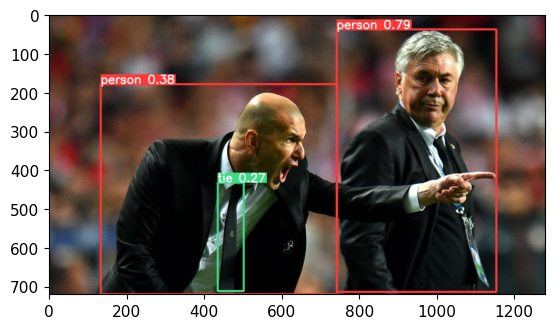

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [54, 20, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [72, 50, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 47],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

In [12]:
results.xyxy

[tensor([[7.42641e+02, 3.95821e+01, 1.15488e+03, 7.14964e+02, 7.85666e-01, 0.00000e+00],
         [1.33514e+02, 1.80565e+02, 7.43056e+02, 7.20000e+02, 3.82529e-01, 0.00000e+00],
         [4.35429e+02, 4.33940e+02, 5.02969e+02, 7.12052e+02, 2.68708e-01, 2.70000e+01]], device='cuda:0')]

In [13]:
# Second Prediction

img2 = 'traffic.jpg'

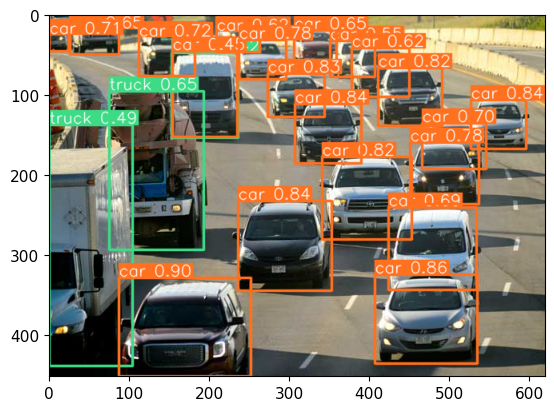

In [14]:
results2 = model(img2)
%matplotlib inline
plt.imshow(np.squeeze(results2.render()))
plt.show()

<h1>4. Real Time Detection</h1>

In [55]:
cap = cv2.VideoCapture('traffic0.mp4')
startTime = 0

height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

while cap.isOpened():
    ret, frame = cap.read()
    
    # Draw guidelines
    cv2.line(frame, (0, int(height/3)), (int(width), int(height/3)), (220,220,220), 1)
    cv2.line(frame, (0, int(2*height/3)), (int(width), int(2*height/3)), (220,220,220), 1)
    cv2.line(frame, (int(width/3), 0), (int(width/3), int(height)), (220,220,220), 1)
    cv2.line(frame, (int(2*width/3), 0), (int(2*width/3), int(height)), (220,220,220), 1)
    
    #Make detections
    results = model(frame)
    
    #results.print()
    #cv2.line(np.squeeze(results.render()), (0, 0), (1000, 1000),(0,255,0), 10)
    
    #FPS
    currentTime = time.time()
    fps = 1/(currentTime - startTime)
    startTime = currentTime
    cv2.putText(frame, "FPS: " + str(int(fps)), (20, 40), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0),3)  
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    #cv2.imshow('YOLO', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()

In [36]:
cap = cv2.VideoCapture('traffic0.mp4')
#cap = cv2.VideoCapture(0)

startTime = 0
# height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
# width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

#print(height, width)

while cap.isOpened():
    ret, frame = cap.read()
    distances = []
    
    # Draw guidelines
    # cv2.line(frame, (0, int(height/3)), (int(width), int(height/3)), (220,220,220), 1)
    # cv2.line(frame, (0, int(2*height/3)), (int(width), int(2*height/3)), (220,220,220), 1)
    # cv2.line(frame, (int(width/3), 0), (int(width/3), int(height)), (220,220,220), 1)
    # cv2.line(frame, (int(2*width/3), 0), (int(2*width/3), int(height)), (220,220,220), 1)
    
    #Make detections
    results = model(frame)
    #results.print()
    
    for i in range(len(results.xyxy[0])):
        print(results.xyxy[0][i])
        if i == 0:
            iv_centroidX = (results.xyxy[0][i][0].item()+results.xyxy[0][i][2].item())/2
            iv_centroidY = (results.xyxy[0][i][1].item()+results.xyxy[0][i][3].item())/2
            
            #print(org)
            # PRINT CENTROIDS
            cv2.circle(frame, org1, 2, (255,255,255), 2)
        else:
            # CHECK CURRENT CENTROID
            iv_centroidX = (results.xyxy[0][i][0].item()+results.xyxy[0][i][2].item())/2
            iv_centroidY = (results.xyxy[0][i][1].item()+results.xyxy[0][i][3].item())/2
            
            # CHECK PREVIOUS CENTROID
            iv_centroidXp = (results.xyxy[0][i-1][0].item()+results.xyxy[0][i-1][2].item())/2
            iv_centroidYp = (results.xyxy[0][i-1][1].item()+results.xyxy[0][i-1][3].item())/2
            
            # DETERMINE TUPLE WITH XY COORDS
            org1 = [int(iv_centroidX), int(iv_centroidY)]
            org2 = [int(iv_centroidXp), int(iv_centroidYp)]
            
            # PASS INFORMATION TO THE DISTANCES LIST
            distances.append([org1, org2])
            #print('Distances', distances)
            #distances = sorted(distances)
            distances.sort(key=lambda x: x[0])
            #print('Distances-Sorted', distances)
            
            # PRINT CENTROIDS
            cv2.circle(frame, org1, 2, (245,245,245), 2)
            if math.sqrt((org2[0]-org1[0])**2+(org2[1]-org1[1])**2) < 100:
                cv2.line(frame, org1, org2, (0,0,255), 1)
            else:
                cv2.line(frame, org1, org2, (255,255,255), 1)
            
        
    #FPS
    currentTime = time.time()
    fps = 1/(currentTime - startTime)
    startTime = currentTime
    cv2.putText(frame, "FPS: " + str(int(fps)), (20, 40), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0),3)   
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
        
    if cv2.waitKey(2) & 0xFF == ord('p'):
        print(f'*** DB COMMIT ***')
        #d=√((x_2-x_1)²+(y_2-y_1)²)
        for i in range(len(distances)):
            print(f'DISTANCE {i}: {math.sqrt((distances[i][1][0]-distances[i][0][0])**2+(distances[i][1][1]-distances[i][0][1])**2)}')
    
    
    if cv2.waitKey(2) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()

tensor([310.64600, 213.03064, 343.11469, 236.98680,   0.59536,   2.00000], device='cuda:0')
tensor([157.83223, 232.46883, 205.47754, 262.68567,   0.42813,   2.00000], device='cuda:0')
tensor([308.45877, 215.73436, 340.35892, 237.88959,   0.57139,   2.00000], device='cuda:0')
tensor([150.99605, 234.64012, 199.16223, 266.04791,   0.47993,   2.00000], device='cuda:0')
tensor([2.88264e+02, 1.35722e+02, 5.84401e+02, 1.94823e+02, 4.24591e-01, 4.00000e+00], device='cuda:0')
tensor([305.68567, 216.55113, 338.88568, 239.86079,   0.57500,   2.00000], device='cuda:0')
tensor([142.51071, 234.79239, 192.69727, 268.64999,   0.52287,   2.00000], device='cuda:0')
tensor([2.89351e+02, 1.36756e+02, 5.84454e+02, 1.93031e+02, 3.31975e-01, 4.00000e+00], device='cuda:0')
tensor([302.73364, 215.69948, 336.22372, 239.87907,   0.37936,   2.00000], device='cuda:0')
tensor([2.87454e+02, 1.36434e+02, 5.82489e+02, 1.95930e+02, 3.63123e-01, 4.00000e+00], device='cuda:0')
tensor([133.68640, 237.49635, 189.17006, 271

tensor([172.40677, 280.19577, 243.72925, 332.69476,   0.75143,   2.00000], device='cuda:0')
tensor([6.82751e+02, 2.47792e+02, 7.50326e+02, 2.86503e+02, 5.78053e-01, 2.00000e+00], device='cuda:0')
tensor([8.40840e+02, 3.73685e+02, 8.53199e+02, 4.11632e+02, 4.45010e-01, 2.00000e+00], device='cuda:0')
tensor([5.11152e+02, 2.69523e+02, 5.65781e+02, 3.16165e+02, 3.86489e-01, 7.00000e+00], device='cuda:0')
tensor([5.12224e+02, 2.68880e+02, 5.64732e+02, 3.15614e+02, 3.40732e-01, 2.00000e+00], device='cuda:0')
tensor([4.37245e+02, 1.64934e+02, 4.55544e+02, 1.80109e+02, 2.69833e-01, 2.00000e+00], device='cuda:0')
tensor([3.02211e+02, 1.90438e+02, 3.33618e+02, 2.36523e+02, 2.56954e-01, 7.00000e+00], device='cuda:0')
tensor([160.38142, 284.40677, 234.30910, 340.78476,   0.76490,   2.00000], device='cuda:0')
tensor([6.77727e+02, 2.46083e+02, 7.41378e+02, 2.84705e+02, 6.62897e-01, 2.00000e+00], device='cuda:0')
tensor([509.73361, 264.74475, 560.48615, 308.62454,   0.61947,   2.00000], device='cuda:

tensor([658.42841, 322.83682, 761.56732, 397.52692,   0.80414,   2.00000], device='cuda:0')
tensor([675.06012, 276.30811, 750.51324, 319.00583,   0.75690,   2.00000], device='cuda:0')
tensor([625.60571, 223.12645, 667.73706, 249.40096,   0.67391,   2.00000], device='cuda:0')
tensor([261.76474, 225.85733, 301.81390, 258.17014,   0.58857,   2.00000], device='cuda:0')
tensor([4.87395e+02, 2.28331e+02, 5.21999e+02, 2.59074e+02, 4.50615e-01, 2.00000e+00], device='cuda:0')
tensor([288.71786, 193.79382, 313.58688, 211.01239,   0.41176,   2.00000], device='cuda:0')
tensor([1.86177e+00, 3.84586e+02, 1.14014e+02, 4.78976e+02, 4.09995e-01, 2.00000e+00], device='cuda:0')
tensor([4.88295e+02, 2.29381e+02, 5.21960e+02, 2.59797e+02, 2.51084e-01, 7.00000e+00], device='cuda:0')
tensor([666.86572, 273.30228, 740.58521, 313.68231,   0.77471,   2.00000], device='cuda:0')
tensor([6.47558e+02, 3.15304e+02, 7.49235e+02, 3.86110e+02, 7.20351e-01, 2.00000e+00], device='cuda:0')
tensor([619.78229, 219.27084, 66

In [ ]:
cap = cv2.VideoCapture('traffic0.mp4')
startTime = 0

while cap.isOpened():
    ret, frame = cap.read()
    distances = []
    
    #Make detections
    results = model(frame)
    
    for i in range(len(results.xyxy[0])):
        iv_centroidX = (results.xyxy[0][i][0].item()+results.xyxy[0][i][2].item())/2
        iv_centroidY = (results.xyxy[0][i][1].item()+results.xyxy[0][i][3].item())/2
        
        # DETERMINE TUPLE WITH XY COORDS
        org1 = (int(iv_centroidX), int(iv_centroidY))
        distances.append(org1)
        # print('For loop', distances)
        if i == 0:
            # PRINT CENTROIDS
            cv2.circle(frame, org1, 2, (255,255,255), 2)
        else:
            # PRINT CENTROIDS
            cv2.circle(frame, org1, 2, (245,245,245), 2)
    else:
        distances.sort(key=lambda x: x[0])
        print('Sorted', distances)
        
        for i in range(len(distances)):
            print(f'{i} - {distances[i]}')
            # CHECK CURRENT CENTROID
            iv_centroidX = distances[i][0]
            iv_centroidY = distances[i][1]
            
            if i == 0:
                pass
            else:
                # CHECK PREVIOUS CENTROID
                iv_centroidXp = distances[i-1][0]
                iv_centroidYp = distances[i-1][1]
                
                # DETERMINE TUPLE WITH XY COORDS
                org1 = [int(iv_centroidX), int(iv_centroidY)]
                org2 = [int(iv_centroidXp), int(iv_centroidYp)]
                
                if math.sqrt((org2[0]-org1[0])**2+(org2[1]-org1[1])**2) < 100:
                    cv2.arrowedLine(frame, org2, org1, (0,0,255), 1)
                else:
                    cv2.arrowedLine(frame, org2, org1, (255,255,255), 1)
                    
    #FPS
    currentTime = time.time()
    fps = 1/(currentTime - startTime)
    startTime = currentTime
    cv2.putText(frame, "FPS: " + str(int(fps)), (20, 40), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0), 3)
            
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(2) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()

Sorted [(181, 247), (326, 225)]
0 - (181, 247)
1 - (326, 225)
Sorted [(175, 250), (324, 226), (436, 165)]
0 - (175, 250)
1 - (324, 226)
2 - (436, 165)
Sorted [(167, 251), (322, 228), (436, 164)]
0 - (167, 251)
1 - (322, 228)
2 - (436, 164)
Sorted [(161, 254), (319, 227), (434, 166)]
0 - (161, 254)
1 - (319, 227)
2 - (434, 166)
Sorted [(161, 254), (319, 227), (435, 165)]
0 - (161, 254)
1 - (319, 227)
2 - (435, 165)
Sorted [(144, 261), (311, 233)]
0 - (144, 261)
1 - (311, 233)
Sorted [(136, 264), (307, 235)]
0 - (136, 264)
1 - (307, 235)
Sorted [(129, 266), (305, 239)]
0 - (129, 266)
1 - (305, 239)
Sorted [(118, 272), (301, 240)]
0 - (118, 272)
1 - (301, 240)
Sorted [(106, 274), (297, 242)]
0 - (106, 274)
1 - (297, 242)
Sorted [(96, 278), (294, 246)]
0 - (96, 278)
1 - (294, 246)
Sorted [(84, 285), (291, 249), (663, 436)]
0 - (84, 285)
1 - (291, 249)
2 - (663, 436)
Sorted [(71, 289), (288, 251), (648, 427)]
0 - (71, 289)
1 - (288, 251)
2 - (648, 427)
Sorted [(60, 295), (339, 206), (505, 2

Sorted [(139, 335), (252, 220), (479, 204), (574, 251), (581, 203), (587, 214), (588, 344), (589, 344), (591, 227)]
0 - (139, 335)
1 - (252, 220)
2 - (479, 204)
3 - (574, 251)
4 - (581, 203)
5 - (587, 214)
6 - (588, 344)
7 - (589, 344)
8 - (591, 227)
Sorted [(123, 344), (125, 136), (248, 221), (479, 202), (570, 249), (582, 332), (582, 332), (585, 213), (588, 225)]
0 - (123, 344)
1 - (125, 136)
2 - (248, 221)
3 - (479, 202)
4 - (570, 249)
5 - (582, 332)
6 - (582, 332)
7 - (585, 213)
8 - (588, 225)
Sorted [(106, 356), (123, 135), (245, 222), (478, 201), (567, 245), (572, 323), (582, 212), (584, 224)]
0 - (106, 356)
1 - (123, 135)
2 - (245, 222)
3 - (478, 201)
4 - (567, 245)
5 - (572, 323)
6 - (582, 212)
7 - (584, 224)
Sorted [(87, 370), (122, 135), (242, 225), (564, 242), (567, 315), (578, 209), (582, 223)]
0 - (87, 370)
1 - (122, 135)
2 - (242, 225)
3 - (564, 242)
4 - (567, 315)
5 - (578, 209)
6 - (582, 223)
Sorted [(69, 384), (239, 228), (558, 306), (559, 307), (561, 240), (576, 208), 

<h1>5. Train from Scratch</h1>

In [ ]:
# Import dependencies

import uuid
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') # Where the images are going to be saved
labels = ['tape', 'label', 'citroen', 'peugeot'] # Labels used
number_images = 18 # Number of images to take pictures

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    #Loop through image range
    for img_num in range(number_images):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Web cam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image path
        cv2.imwrite(imgname, frame)
        
        # Render to the screen 
        cv2.imshow('Image Collection', frame)
        
        # Give time between capture iteractions
        time.sleep(1.5)
        
        # Break character
        if cv2.waitKey(10) & 0xff == ord('q'):
            break

# Release all windows
cap.release()
cv2.destroyAllWindows()

<h2>Label Images</h2>

In [ ]:
# Clone git repository for the labeling of images
!git clone https://github.com/tzutalin/labelImg

In [ ]:
# Install dependencies
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

<h3>Train Model</h3>

<h5>Explanation of attributes</h5>
<ol>
    <li><b>batch:</b> batch size</li>
    <li><b>epochs:</b> number of epochs to train for</li>
    <li><b>data:</b> yaml file that contains info about the dataset (path of images, labels...)</li>
    <li><b>workers:</b> number of CPU workers</li>
    <li><b>cfg:</b> model architecture</li>
    <li><b>weights:</b> pretrained weights we want to start training for</li>
    <li><b>name:</b> train logs; weights to be stored on folder names runs/train/name</li>
    <li><b>hyp:</b> yaml file that describes hyperparameter choices</li>
</ol>

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 32 --epochs 1000 --data dataset.yaml --weights yolov5s.pt

<h1>6. Load Custom Model</h1>

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp9/weights/last.pt', force_reload=True)

NameError: name 'torch' is not defined

In [ ]:
test_img = 'label.e6fd052c-5f56-11ed-a1b7-047bcb5a1a09.jpg'
img = os.path.join('data', 'images', test_img)
results = model(img)
results.print()

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()

<h3>Additional Tests</h3>

In [34]:
# Crop images detected to an external page
crops = results.crop(save=True)
crops

Saved 1 image to runs\detect\exp5
Saved results to runs\detect\exp5



[{'box': [tensor(543.27374, device='cuda:0'),
   tensor(183.24326, device='cuda:0'),
   tensor(564.31787, device='cuda:0'),
   tensor(195.44116, device='cuda:0')],
  'conf': tensor(0.34889, device='cuda:0'),
  'cls': tensor(2., device='cuda:0'),
  'label': 'car 0.35',
  'im': array([[[248, 250, 255],
          [130, 175, 255],
          [ 31, 112, 255],
          ...,
          [ 84, 146, 255],
          [ 31, 112, 255],
          [ 31, 112, 255]],
  
         [[194, 216, 255],
          [ 31, 112, 255],
          [ 31, 112, 255],
          ...,
          [111, 163, 255],
          [ 31, 112, 255],
          [ 31, 112, 255]],
  
         [[ 55, 126, 255],
          [ 31, 112, 255],
          [ 31, 112, 255],
          ...,
          [ 82, 144, 255],
          [ 31, 112, 255],
          [ 31, 112, 255]],
  
         ...,
  
         [[146, 139, 137],
          [149, 142, 140],
          [152, 142, 141],
          ...,
          [127, 122, 124],
          [106, 118, 150],
          [ 31,

In [20]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 480x854 4 cars
Speed: 2.0ms pre-process, 16.0ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)

In [21]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,125.879082,240.704758,197.324051,286.253876,0.710317,2,car
1,695.766479,284.349060,775.678101,322.653198,0.454885,2,car
2,489.832306,224.005066,527.659424,258.862030,0.449366,2,car
3,514.910339,202.969940,544.840393,225.646042,0.407721,2,car


In [22]:
results.pandas()

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 480x854 4 cars
Speed: 2.0ms pre-process, 16.0ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)

In [ ]:
# Print coordinates and confidence for names and classes
print(results.pandas().xyxy[0].keys())

# print(type(results.xyxy[0]))

# for tensor in results.xyxy[0]:
#     print(tensor[].item())

for i in range (len(results.xyxy[0])):
    centroid = [(results.xyxy[0][i][0].item()+results.xyxy[0][i][2].item())/2, (results.xyxy[0][i][1].item()+results.xyxy[0][i][3].item())/2]
    print(centroid)
    #for j in range(len(results.xyxy[0][i])):
        #print(results.xyxy[0][i][j])

In [ ]:
print(results.xyxy[0][0][0].item())
print(results.xyxy[0][0][2].item())
print(results.xyxy[0][0][2].item() - results.xyxy[0][0][0].item())

In [ ]:
results.xyxy

In [ ]:
import requests
requests.get("http://google.com")